# **I-GOOGLE ACCOUNT AUTHENTIFICATION**

In [1]:
from google.colab import auth
auth.authenticate_user()


# **II-IMPORT THE REQUIREMENTS LIBRARIES**

In [ ]:
! pip install -q -U zarr xarray gcsfs
import xarray as xr
import gcsfs
import zarr
import pandas as pd
import matplotlib.pyplot as plt
# import cupy as cp
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [ ]:
# define the neuralgcm path data
era_5_path = 'gs://weatherbench2/datasets/era5/1959-2023_01_10-wb13-6h-1440x721_with_derived_variables.zarr'
#load the data
era5 = xr.open_zarr(era_5_path )

In [ ]:
era5

<xarray.Dataset> Size: 89TB
Dimensions:                                           (time: 93544,
                                                       latitude: 721,
                                                       longitude: 1440,
                                                       level: 13)
Coordinates:
  * latitude                                          (latitude) float32 3kB ...
  * level                                             (level) int64 104B 50 ....
  * longitude                                         (longitude) float32 6kB ...
  * time                                              (time) datetime64[ns] 748kB ...
Data variables: (12/62)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 388GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 388GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    10m_wind_speed                                    (time, latitude, longitude) float32 388GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    2m_dewpoint_temperature                           (time, latitude, longitude) float32 388GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 388GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    above_ground                                      (time, level, latitude, longitude) float32 5TB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    ...                                                ...
    volumetric_soil_water_layer_1                     (time, latitude, longitude) float32 388GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    volumetric_soil_water_layer_2                     (time, latitude, longitude) float32 388GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    volumetric_soil_water_layer_3                     (time, latitude, longitude) float32 388GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    volumetric_soil_water_layer_4                     (time, latitude, longitude) float32 388GB dask.array<chunksize=(1, 721, 1440), meta=np.ndarray>
    vorticity                                         (time, level, latitude, longitude) float32 5TB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>
    wind_speed                                        (time, level, latitude, longitude) float32 5TB dask.array<chunksize=(1, 13, 721, 1440), meta=np.ndarray>

In [ ]:
#display the variable
for var_name in era5.data_vars:
  # Access the variable using square bracket notation with the variable name string
  display(era5[var_name])


<xarray.DataArray '10m_u_component_of_wind' (time: 93544, latitude: 721,
                                             longitude: 1440)> Size: 388GB
dask.array<open_dataset-10m_u_component_of_wind, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   10 metre U wind component
    short_name:  u10
    units:       m s**-1

<xarray.DataArray '10m_v_component_of_wind' (time: 93544, latitude: 721,
                                             longitude: 1440)> Size: 388GB
dask.array<open_dataset-10m_v_component_of_wind, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   10 metre V wind component
    short_name:  v10
    units:       m s**-1

<xarray.DataArray '10m_wind_speed' (time: 93544, latitude: 721, longitude: 1440)> Size: 388GB
dask.array<open_dataset-10m_wind_speed, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray '2m_dewpoint_temperature' (time: 93544, latitude: 721,
                                             longitude: 1440)> Size: 388GB
dask.array<open_dataset-2m_dewpoint_temperature, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   2 metre dewpoint temperature
    short_name:  d2m
    units:       K

<xarray.DataArray '2m_temperature' (time: 93544, latitude: 721, longitude: 1440)> Size: 388GB
dask.array<open_dataset-2m_temperature, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

<xarray.DataArray 'above_ground' (time: 93544, level: 13, latitude: 721,
                                  longitude: 1440)> Size: 5TB
dask.array<open_dataset-above_ground, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'ageostrophic_wind_speed' (time: 93544, level: 13,
                                             latitude: 721, longitude: 1440)> Size: 5TB
dask.array<open_dataset-ageostrophic_wind_speed, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'angle_of_sub_gridscale_orography' (latitude: 721,
                                                      longitude: 1440)> Size: 4MB
dask.array<open_dataset-angle_of_sub_gridscale_orography, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   Angle of sub-gridscale orography
    short_name:  anor
    units:       radians

<xarray.DataArray 'anisotropy_of_sub_gridscale_orography' (latitude: 721,
                                                           longitude: 1440)> Size: 4MB
dask.array<open_dataset-anisotropy_of_sub_gridscale_orography, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   Anisotropy of sub-gridscale orography
    short_name:  isor
    units:       ~

<xarray.DataArray 'boundary_layer_height' (time: 93544, latitude: 721,
                                           longitude: 1440)> Size: 388GB
dask.array<open_dataset-boundary_layer_height, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Boundary layer height
    short_name:  blh
    units:       m

<xarray.DataArray 'divergence' (time: 93544, level: 13, latitude: 721,
                                longitude: 1440)> Size: 5TB
dask.array<open_dataset-divergence, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'eddy_kinetic_energy' (time: 93544, latitude: 721,
                                         longitude: 1440)> Size: 388GB
dask.array<open_dataset-eddy_kinetic_energy, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'geopotential' (time: 93544, level: 13, latitude: 721,
                                  longitude: 1440)> Size: 5TB
dask.array<open_dataset-geopotential, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

<xarray.DataArray 'geopotential_at_surface' (latitude: 721, longitude: 1440)> Size: 4MB
dask.array<open_dataset-geopotential_at_surface, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

<xarray.DataArray 'geostrophic_wind_speed' (time: 93544, level: 13,
                                            latitude: 721, longitude: 1440)> Size: 5TB
dask.array<open_dataset-geostrophic_wind_speed, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'high_vegetation_cover' (latitude: 721, longitude: 1440)> Size: 4MB
dask.array<open_dataset-high_vegetation_cover, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   High vegetation cover
    short_name:  cvh
    units:       (0 - 1)

<xarray.DataArray 'integrated_vapor_transport' (time: 93544, latitude: 721,
                                                longitude: 1440)> Size: 388GB
dask.array<open_dataset-integrated_vapor_transport, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'lake_cover' (latitude: 721, longitude: 1440)> Size: 4MB
dask.array<open_dataset-lake_cover, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   Lake cover
    short_name:  cl
    units:       (0 - 1)

<xarray.DataArray 'land_sea_mask' (latitude: 721, longitude: 1440)> Size: 4MB
dask.array<open_dataset-land_sea_mask, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:      Land-sea mask
    short_name:     lsm
    standard_name:  land_binary_mask
    units:          (0 - 1)

<xarray.DataArray 'lapse_rate' (time: 93544, level: 13, latitude: 721,
                                longitude: 1440)> Size: 5TB
dask.array<open_dataset-lapse_rate, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'leaf_area_index_high_vegetation' (time: 93544,
                                                     latitude: 721,
                                                     longitude: 1440)> Size: 388GB
dask.array<open_dataset-leaf_area_index_high_vegetation, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Leaf area index, high vegetation
    short_name:  lai_hv
    units:       m**2 m**-2

<xarray.DataArray 'leaf_area_index_low_vegetation' (time: 93544, latitude: 721,
                                                    longitude: 1440)> Size: 388GB
dask.array<open_dataset-leaf_area_index_low_vegetation, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Leaf area index, low vegetation
    short_name:  lai_lv
    units:       m**2 m**-2

<xarray.DataArray 'low_vegetation_cover' (latitude: 721, longitude: 1440)> Size: 4MB
dask.array<open_dataset-low_vegetation_cover, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   Low vegetation cover
    short_name:  cvl
    units:       (0 - 1)

<xarray.DataArray 'mean_sea_level_pressure' (time: 93544, latitude: 721,
                                             longitude: 1440)> Size: 388GB
dask.array<open_dataset-mean_sea_level_pressure, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Mean sea level pressure
    short_name:     msl
    standard_name:  air_pressure_at_mean_sea_level
    units:          Pa

<xarray.DataArray 'mean_surface_latent_heat_flux' (time: 93544, latitude: 721,
                                                   longitude: 1440)> Size: 388GB
dask.array<open_dataset-mean_surface_latent_heat_flux, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean surface latent heat flux
    short_name:  mslhf
    units:       W m**-2

<xarray.DataArray 'mean_surface_net_long_wave_radiation_flux' (time: 93544,
                                                               latitude: 721,
                                                               longitude: 1440)> Size: 388GB
dask.array<open_dataset-mean_surface_net_long_wave_radiation_flux, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean surface net long-wave radiation flux
    short_name:  msnlwrf
    units:       W m**-2

<xarray.DataArray 'mean_surface_net_short_wave_radiation_flux' (time: 93544,
                                                                latitude: 721,
                                                                longitude: 1440)> Size: 388GB
dask.array<open_dataset-mean_surface_net_short_wave_radiation_flux, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean surface net short-wave radiation flux
    short_name:  msnswrf
    units:       W m**-2

<xarray.DataArray 'mean_surface_sensible_heat_flux' (time: 93544,
                                                     latitude: 721,
                                                     longitude: 1440)> Size: 388GB
dask.array<open_dataset-mean_surface_sensible_heat_flux, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean surface sensible heat flux
    short_name:  msshf
    units:       W m**-2

<xarray.DataArray 'mean_top_downward_short_wave_radiation_flux' (time: 93544,
                                                                 latitude: 721,
                                                                 longitude: 1440)> Size: 388GB
dask.array<open_dataset-mean_top_downward_short_wave_radiation_flux, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean top downward short-wave radiation flux
    short_name:  mtdwswrf
    units:       W m**-2

<xarray.DataArray 'mean_top_net_long_wave_radiation_flux' (time: 93544,
                                                           latitude: 721,
                                                           longitude: 1440)> Size: 388GB
dask.array<open_dataset-mean_top_net_long_wave_radiation_flux, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean top net long-wave radiation flux
    short_name:  mtnlwrf
    units:       W m**-2

<xarray.DataArray 'mean_top_net_short_wave_radiation_flux' (time: 93544,
                                                            latitude: 721,
                                                            longitude: 1440)> Size: 388GB
dask.array<open_dataset-mean_top_net_short_wave_radiation_flux, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean top net short-wave radiation flux
    short_name:  mtnswrf
    units:       W m**-2

<xarray.DataArray 'mean_vertically_integrated_moisture_divergence' (
                                                                    time: 93544,
                                                                    latitude: 721,
                                                                    longitude: 1440)> Size: 388GB
dask.array<open_dataset-mean_vertically_integrated_moisture_divergence, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean vertically integrated moisture divergence
    short_name:  mvimd
    units:       kg m**-2 s**-1

<xarray.DataArray 'potential_vorticity' (time: 93544, level: 13, latitude: 721,
                                         longitude: 1440)> Size: 5TB
dask.array<open_dataset-potential_vorticity, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Potential vorticity
    short_name:  pv
    units:       K m**2 kg**-1 s**-1

<xarray.DataArray 'relative_humidity' (time: 93544, level: 13, latitude: 721,
                                       longitude: 1440)> Size: 5TB
dask.array<open_dataset-relative_humidity, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'sea_ice_cover' (time: 93544, latitude: 721, longitude: 1440)> Size: 388GB
dask.array<open_dataset-sea_ice_cover, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Sea ice area fraction
    short_name:     siconc
    standard_name:  sea_ice_area_fraction
    units:          (0 - 1)

<xarray.DataArray 'sea_surface_temperature' (time: 93544, latitude: 721,
                                             longitude: 1440)> Size: 388GB
dask.array<open_dataset-sea_surface_temperature, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Sea surface temperature
    short_name:  sst
    units:       K

<xarray.DataArray 'slope_of_sub_gridscale_orography' (latitude: 721,
                                                      longitude: 1440)> Size: 4MB
dask.array<open_dataset-slope_of_sub_gridscale_orography, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   Slope of sub-gridscale orography
    short_name:  slor
    units:       ~

<xarray.DataArray 'snow_depth' (time: 93544, latitude: 721, longitude: 1440)> Size: 388GB
dask.array<open_dataset-snow_depth, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Snow depth
    short_name:     sd
    standard_name:  lwe_thickness_of_surface_snow_amount
    units:          m of water equivalent

<xarray.DataArray 'soil_type' (latitude: 721, longitude: 1440)> Size: 4MB
dask.array<open_dataset-soil_type, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   Soil type
    short_name:  slt
    units:       ~

<xarray.DataArray 'specific_humidity' (time: 93544, level: 13, latitude: 721,
                                       longitude: 1440)> Size: 5TB
dask.array<open_dataset-specific_humidity, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Specific humidity
    short_name:     q
    standard_name:  specific_humidity
    units:          kg kg**-1

<xarray.DataArray 'standard_deviation_of_filtered_subgrid_orography' (
                                                                      latitude: 721,
                                                                      longitude: 1440)> Size: 4MB
dask.array<open_dataset-standard_deviation_of_filtered_subgrid_orography, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   Standard deviation of filtered subgrid orography
    short_name:  sdfor
    units:       m

<xarray.DataArray 'standard_deviation_of_orography' (latitude: 721,
                                                     longitude: 1440)> Size: 4MB
dask.array<open_dataset-standard_deviation_of_orography, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   Standard deviation of orography
    short_name:  sdor
    units:       m

<xarray.DataArray 'surface_pressure' (time: 93544, latitude: 721,
                                      longitude: 1440)> Size: 388GB
dask.array<open_dataset-surface_pressure, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Surface pressure
    short_name:     sp
    standard_name:  surface_air_pressure
    units:          Pa

<xarray.DataArray 'temperature' (time: 93544, level: 13, latitude: 721,
                                 longitude: 1440)> Size: 5TB
dask.array<open_dataset-temperature, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Temperature
    short_name:     t
    standard_name:  air_temperature
    units:          K

<xarray.DataArray 'total_cloud_cover' (time: 93544, latitude: 721,
                                       longitude: 1440)> Size: 388GB
dask.array<open_dataset-total_cloud_cover, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Total cloud cover
    short_name:     tcc
    standard_name:  cloud_area_fraction
    units:          (0 - 1)

<xarray.DataArray 'total_column_vapor' (time: 93544, latitude: 721,
                                        longitude: 1440)> Size: 388GB
dask.array<open_dataset-total_column_vapor, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'total_column_water' (time: 93544, latitude: 721,
                                        longitude: 1440)> Size: 388GB
dask.array<open_dataset-total_column_water, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Total column water
    short_name:  tcw
    units:       kg m**-2

<xarray.DataArray 'total_column_water_vapour' (time: 93544, latitude: 721,
                                               longitude: 1440)> Size: 388GB
dask.array<open_dataset-total_column_water_vapour, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Total column vertically-integrated water vapour
    short_name:     tcwv
    standard_name:  lwe_thickness_of_atmosphere_mass_content_of_water_vapor
    units:          kg m**-2

<xarray.DataArray 'total_precipitation_12hr' (time: 93544, latitude: 721,
                                              longitude: 1440)> Size: 388GB
dask.array<open_dataset-total_precipitation_12hr, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Total precipitation
    short_name:  tp
    units:       m

<xarray.DataArray 'total_precipitation_24hr' (time: 93544, latitude: 721,
                                              longitude: 1440)> Size: 388GB
dask.array<open_dataset-total_precipitation_24hr, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Total precipitation
    short_name:  tp
    units:       m

<xarray.DataArray 'total_precipitation_6hr' (time: 93544, latitude: 721,
                                             longitude: 1440)> Size: 388GB
dask.array<open_dataset-total_precipitation_6hr, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Total precipitation
    short_name:  tp
    units:       m

<xarray.DataArray 'type_of_high_vegetation' (latitude: 721, longitude: 1440)> Size: 4MB
dask.array<open_dataset-type_of_high_vegetation, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   Type of high vegetation
    short_name:  tvh
    units:       ~

<xarray.DataArray 'type_of_low_vegetation' (latitude: 721, longitude: 1440)> Size: 4MB
dask.array<open_dataset-type_of_low_vegetation, shape=(721, 1440), dtype=float32, chunksize=(721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
Attributes:
    long_name:   Type of low vegetation
    short_name:  tvl
    units:       ~

<xarray.DataArray 'u_component_of_wind' (time: 93544, level: 13, latitude: 721,
                                         longitude: 1440)> Size: 5TB
dask.array<open_dataset-u_component_of_wind, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      U component of wind
    short_name:     u
    standard_name:  eastward_wind
    units:          m s**-1

<xarray.DataArray 'v_component_of_wind' (time: 93544, level: 13, latitude: 721,
                                         longitude: 1440)> Size: 5TB
dask.array<open_dataset-v_component_of_wind, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      V component of wind
    short_name:     v
    standard_name:  northward_wind
    units:          m s**-1

<xarray.DataArray 'vertical_velocity' (time: 93544, level: 13, latitude: 721,
                                       longitude: 1440)> Size: 5TB
dask.array<open_dataset-vertical_velocity, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Vertical velocity
    short_name:     w
    standard_name:  lagrangian_tendency_of_air_pressure
    units:          Pa s**-1

<xarray.DataArray 'volumetric_soil_water_layer_1' (time: 93544, latitude: 721,
                                                   longitude: 1440)> Size: 388GB
dask.array<open_dataset-volumetric_soil_water_layer_1, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Volumetric soil water layer 1
    short_name:  swvl1
    units:       m**3 m**-3

<xarray.DataArray 'volumetric_soil_water_layer_2' (time: 93544, latitude: 721,
                                                   longitude: 1440)> Size: 388GB
dask.array<open_dataset-volumetric_soil_water_layer_2, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Volumetric soil water layer 2
    short_name:  swvl2
    units:       m**3 m**-3

<xarray.DataArray 'volumetric_soil_water_layer_3' (time: 93544, latitude: 721,
                                                   longitude: 1440)> Size: 388GB
dask.array<open_dataset-volumetric_soil_water_layer_3, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Volumetric soil water layer 3
    short_name:  swvl3
    units:       m**3 m**-3

<xarray.DataArray 'volumetric_soil_water_layer_4' (time: 93544, latitude: 721,
                                                   longitude: 1440)> Size: 388GB
dask.array<open_dataset-volumetric_soil_water_layer_4, shape=(93544, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Volumetric soil water layer 4
    short_name:  swvl4
    units:       m**3 m**-3

<xarray.DataArray 'vorticity' (time: 93544, level: 13, latitude: 721,
                               longitude: 1440)> Size: 5TB
dask.array<open_dataset-vorticity, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'wind_speed' (time: 93544, level: 13, latitude: 721,
                                longitude: 1440)> Size: 5TB
dask.array<open_dataset-wind_speed, shape=(93544, 13, 721, 1440), dtype=float32, chunksize=(1, 13, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

In [ ]:
#the size of the era5 data
era5.nbytes/1e9

88963.00301054

# **Data Understanding**

In [ ]:
era5.info()

xarray.Dataset {
dimensions:
	time = 93544 ;
	latitude = 721 ;
	longitude = 1440 ;
	level = 13 ;

variables:
	float32 10m_u_component_of_wind(time, latitude, longitude) ;
		10m_u_component_of_wind:long_name = 10 metre U wind component ;
		10m_u_component_of_wind:short_name = u10 ;
		10m_u_component_of_wind:units = m s**-1 ;
	float32 10m_v_component_of_wind(time, latitude, longitude) ;
		10m_v_component_of_wind:long_name = 10 metre V wind component ;
		10m_v_component_of_wind:short_name = v10 ;
		10m_v_component_of_wind:units = m s**-1 ;
	float32 10m_wind_speed(time, latitude, longitude) ;
	float32 2m_dewpoint_temperature(time, latitude, longitude) ;
		2m_dewpoint_temperature:long_name = 2 metre dewpoint temperature ;
		2m_dewpoint_temperature:short_name = d2m ;
		2m_dewpoint_temperature:units = K ;
	float32 2m_temperature(time, latitude, longitude) ;
		2m_temperature:long_name = 2 metre temperature ;
		2m_temperature:short_name = t2m ;
		2m_temperature:units = K ;
	float32 above_ground

In [ ]:
#the min and the max values of time in the global neural GCM
print(f"the min date is :",era5.time.min().values)
print(f"the max date is :",era5.time.max().values)

the min date is : 1959-01-01T00:00:00.000000000
the max date is : 2023-01-10T18:00:00.000000000


# **Era5 data for our domain**

# select the variables of interest:
*  Evaporation
*	Temperature
*	Geopotential
* 	Precipitation

* Specific_Cloud_Ice_Water_Content
*	Specific_Cloud_Liquid_Water_Content
* Specific_Humidity
*	U_Component_of_Wind
*	V_Component_of_Wind

In [ ]:
#verify the slice of longitude and latidude
print(era5.coords['longitude'].min().values)
print(era5.coords['longitude'].max().values)
print(era5.coords['latitude'].min().values)
print(era5.coords['latitude'].max().values)

0.0
359.75
-90.0
90.0


In [ ]:
era5_data_africa = era5.sel(
    latitude=slice(26 , -14),       #
    longitude=slice(19,55)       #
)


In [ ]:
era5_data_africa

<xarray.Dataset> Size: 2TB
Dimensions:                                           (time: 93544,
                                                       latitude: 161,
                                                       longitude: 145, level: 13)
Coordinates:
  * latitude                                          (latitude) float32 644B ...
  * level                                             (level) int64 104B 50 ....
  * longitude                                         (longitude) float32 580B ...
  * time                                              (time) datetime64[ns] 748kB ...
Data variables: (12/62)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 9GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 9GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    10m_wind_speed                                    (time, latitude, longitude) float32 9GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    2m_dewpoint_temperature                           (time, latitude, longitude) float32 9GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 9GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    above_ground                                      (time, level, latitude, longitude) float32 114GB dask.array<chunksize=(1, 13, 161, 145), meta=np.ndarray>
    ...                                                ...
    volumetric_soil_water_layer_1                     (time, latitude, longitude) float32 9GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    volumetric_soil_water_layer_2                     (time, latitude, longitude) float32 9GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    volumetric_soil_water_layer_3                     (time, latitude, longitude) float32 9GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    volumetric_soil_water_layer_4                     (time, latitude, longitude) float32 9GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    vorticity                                         (time, level, latitude, longitude) float32 114GB dask.array<chunksize=(1, 13, 161, 145), meta=np.ndarray>
    wind_speed                                        (time, level, latitude, longitude) float32 114GB dask.array<chunksize=(1, 13, 161, 145), meta=np.ndarray>

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 92.0 MB/s eta 0:00:00


In [ ]:
era5_data_africa.geopotential.isel({'time':0,'level':0}).values

array([[201702.14, 201699.78, 201699.25, ..., 201197.64, 201197.38,
        201199.75],
       [201703.2 , 201700.83, 201700.83, ..., 201218.22, 201219.27,
        201223.23],
       [201704.25, 201701.89, 201701.89, ..., 201239.31, 201241.69,
        201245.64],
       ...,
       [201355.88, 201323.7 , 201301.81, ..., 201475.88, 201480.36,
        201485.62],
       [201384.62, 201351.66, 201328.19, ..., 201488.27, 201490.64,
        201494.33],
       [201415.22, 201383.31, 201359.31, ..., 201498.3 , 201499.34,
        201500.14]], dtype=float32)

Longitude shape: (145,)
Latitude shape: (161,)


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


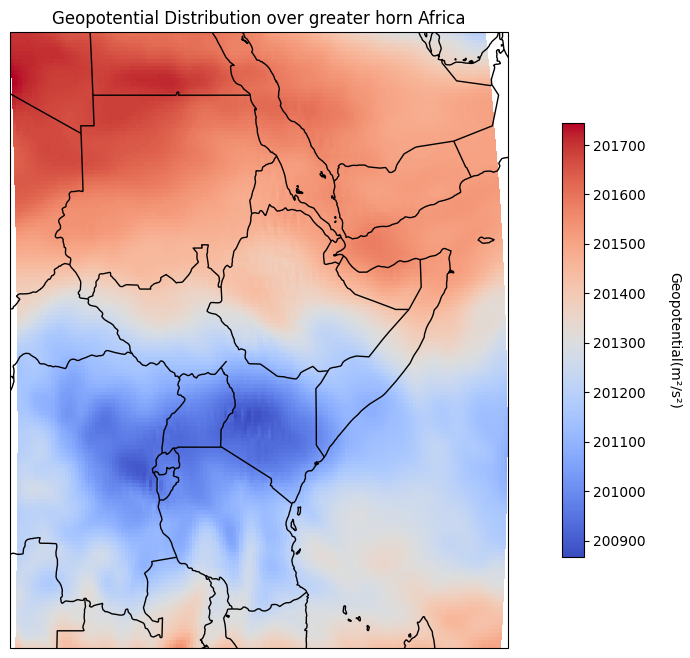

In [ ]:
#cartopy using geopotential
#cartopy using surface pressure
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

lons = era5_data_africa.longitude.values
lats = era5_data_africa.latitude.values
print(f"Longitude shape: {lons.shape}")
print(f"Latitude shape: {lats.shape}")

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
c = plt.pcolormesh(lons, lats,era5_data_africa.geopotential.isel({'time':0,'level':0}).values,transform=ccrs.PlateCarree(), cmap='coolwarm')

cb = plt.colorbar(c, fraction=0.02)

cb.set_label('Geopotential(m²/s²)', rotation=270, labelpad=25)

plt.title('Geopotential Distribution over greater horn Africa')
plt.show()

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


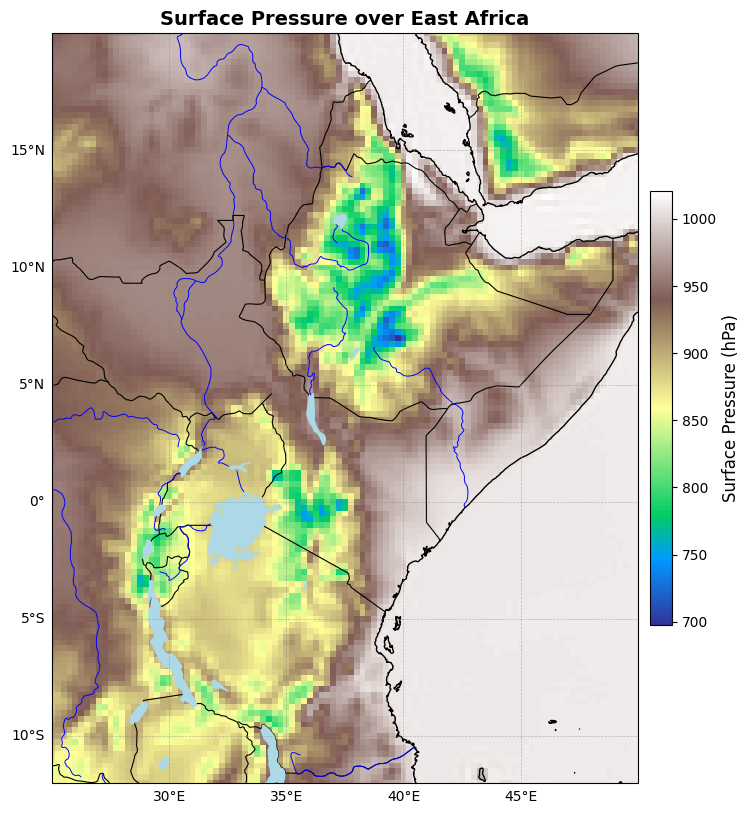

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Create figure and axis
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent for East Africa (adjust as needed)
ax.set_extent([25, 50, -12, 20], crs=ccrs.PlateCarree())

# Add coastlines, borders, and rivers for context
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.7)
ax.add_feature(cfeature.LAKES, facecolor='lightblue')

# Prepare data
lons = era5_data_africa.longitude.values
lats = era5_data_africa.latitude.values
pressure = era5_data_africa.surface_pressure.isel(time=0).values / 100  # Convert to hPa if in Pa

# Plot with terrain-like style
c = plt.pcolormesh(
    lons, lats, pressure,
    transform=ccrs.PlateCarree(),
    cmap='terrain', shading='auto'
)

# Add colorbar
cb = plt.colorbar(c, ax=ax, orientation='vertical', fraction=0.035, pad=0.02)
cb.set_label('Surface Pressure (hPa)', fontsize=12)

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Add title
plt.title("Surface Pressure over East Africa", fontsize=14, fontweight='bold')

# Save as PDF
plt.savefig("surface_pressure_map.pdf", format="pdf", bbox_inches='tight')

plt.show()


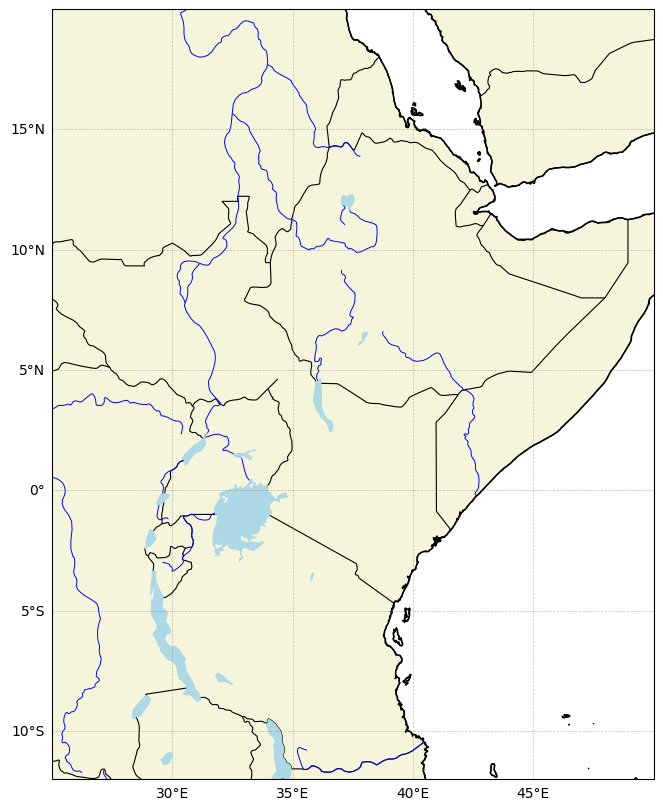

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Création de la figure et des axes
fig = plt.figure(figsize=(8, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Définir la zone d’intérêt (Afrique de l’Est)
ax.set_extent([25, 50, -12, 20], crs=ccrs.PlateCarree())

# Ajouter des traits géographiques
ax.coastlines(resolution='10m', linewidth=1)
ax.add_feature(cfeature.BORDERS, linewidth=0.8)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', linewidth=0.7)
ax.add_feature(cfeature.LAKES, facecolor='lightblue')
ax.add_feature(cfeature.LAND, facecolor='beige', edgecolor='black')

# Ajouter une grille avec labels
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# Ajouter un titre
# plt.title("East Africa Region", fontsize=14, fontweight='bold')

# Sauvegarder en PDF
plt.savefig("east_africa_region.pdf", format="pdf", bbox_inches='tight')

plt.show()


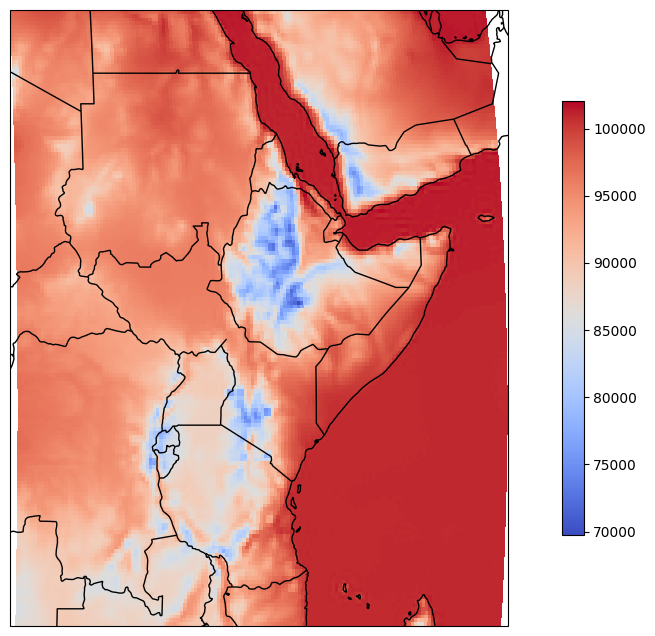

In [ ]:
#cartopy using surface pressure
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

fig = plt.figure(figsize=(14,8))
ax = plt.axes(projection=ccrs.Robinson())

lons = era5_data_africa.longitude.values
lats = era5_data_africa.latitude.values
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=1)
c = plt.pcolormesh(lons, lats,era5_data_africa.surface_pressure.isel({'time':0,}).values,transform=ccrs.PlateCarree(), cmap='coolwarm')

cb = plt.colorbar(c, fraction=0.02)

In [ ]:
#the size of the horn africa data in GO
era5_data_africa.nbytes/1e9

2000.3487305

In [ ]:
for var_name in era5_data_africa.data_vars:
  # Access the variable using square bracket notation with the variable name string
  display(era5_data_africa[var_name])

<xarray.DataArray '10m_u_component_of_wind' (time: 93544, latitude: 161,
                                             longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   10 metre U wind component
    short_name:  u10
    units:       m s**-1

<xarray.DataArray '10m_v_component_of_wind' (time: 93544, latitude: 161,
                                             longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   10 metre V wind component
    short_name:  v10
    units:       m s**-1

<xarray.DataArray '10m_wind_speed' (time: 93544, latitude: 161, longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray '2m_dewpoint_temperature' (time: 93544, latitude: 161,
                                             longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   2 metre dewpoint temperature
    short_name:  d2m
    units:       K

<xarray.DataArray '2m_temperature' (time: 93544, latitude: 161, longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   2 metre temperature
    short_name:  t2m
    units:       K

<xarray.DataArray 'above_ground' (time: 93544, level: 13, latitude: 161,
                                  longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'ageostrophic_wind_speed' (time: 93544, level: 13,
                                             latitude: 161, longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'angle_of_sub_gridscale_orography' (latitude: 161,
                                                      longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   Angle of sub-gridscale orography
    short_name:  anor
    units:       radians

<xarray.DataArray 'anisotropy_of_sub_gridscale_orography' (latitude: 161,
                                                           longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   Anisotropy of sub-gridscale orography
    short_name:  isor
    units:       ~

<xarray.DataArray 'boundary_layer_height' (time: 93544, latitude: 161,
                                           longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Boundary layer height
    short_name:  blh
    units:       m

<xarray.DataArray 'divergence' (time: 93544, level: 13, latitude: 161,
                                longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'eddy_kinetic_energy' (time: 93544, latitude: 161,
                                         longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'geopotential' (time: 93544, level: 13, latitude: 161,
                                  longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

<xarray.DataArray 'geopotential_at_surface' (latitude: 161, longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:      Geopotential
    short_name:     z
    standard_name:  geopotential
    units:          m**2 s**-2

<xarray.DataArray 'geostrophic_wind_speed' (time: 93544, level: 13,
                                            latitude: 161, longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'high_vegetation_cover' (latitude: 161, longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   High vegetation cover
    short_name:  cvh
    units:       (0 - 1)

<xarray.DataArray 'integrated_vapor_transport' (time: 93544, latitude: 161,
                                                longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'lake_cover' (latitude: 161, longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   Lake cover
    short_name:  cl
    units:       (0 - 1)

<xarray.DataArray 'land_sea_mask' (latitude: 161, longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:      Land-sea mask
    short_name:     lsm
    standard_name:  land_binary_mask
    units:          (0 - 1)

<xarray.DataArray 'lapse_rate' (time: 93544, level: 13, latitude: 161,
                                longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'leaf_area_index_high_vegetation' (time: 93544,
                                                     latitude: 161,
                                                     longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Leaf area index, high vegetation
    short_name:  lai_hv
    units:       m**2 m**-2

<xarray.DataArray 'leaf_area_index_low_vegetation' (time: 93544, latitude: 161,
                                                    longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Leaf area index, low vegetation
    short_name:  lai_lv
    units:       m**2 m**-2

<xarray.DataArray 'low_vegetation_cover' (latitude: 161, longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   Low vegetation cover
    short_name:  cvl
    units:       (0 - 1)

<xarray.DataArray 'mean_sea_level_pressure' (time: 93544, latitude: 161,
                                             longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Mean sea level pressure
    short_name:     msl
    standard_name:  air_pressure_at_mean_sea_level
    units:          Pa

<xarray.DataArray 'mean_surface_latent_heat_flux' (time: 93544, latitude: 161,
                                                   longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean surface latent heat flux
    short_name:  mslhf
    units:       W m**-2

<xarray.DataArray 'mean_surface_net_long_wave_radiation_flux' (time: 93544,
                                                               latitude: 161,
                                                               longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean surface net long-wave radiation flux
    short_name:  msnlwrf
    units:       W m**-2

<xarray.DataArray 'mean_surface_net_short_wave_radiation_flux' (time: 93544,
                                                                latitude: 161,
                                                                longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean surface net short-wave radiation flux
    short_name:  msnswrf
    units:       W m**-2

<xarray.DataArray 'mean_surface_sensible_heat_flux' (time: 93544,
                                                     latitude: 161,
                                                     longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean surface sensible heat flux
    short_name:  msshf
    units:       W m**-2

<xarray.DataArray 'mean_top_downward_short_wave_radiation_flux' (time: 93544,
                                                                 latitude: 161,
                                                                 longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean top downward short-wave radiation flux
    short_name:  mtdwswrf
    units:       W m**-2

<xarray.DataArray 'mean_top_net_long_wave_radiation_flux' (time: 93544,
                                                           latitude: 161,
                                                           longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean top net long-wave radiation flux
    short_name:  mtnlwrf
    units:       W m**-2

<xarray.DataArray 'mean_top_net_short_wave_radiation_flux' (time: 93544,
                                                            latitude: 161,
                                                            longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean top net short-wave radiation flux
    short_name:  mtnswrf
    units:       W m**-2

<xarray.DataArray 'mean_vertically_integrated_moisture_divergence' (
                                                                    time: 93544,
                                                                    latitude: 161,
                                                                    longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Mean vertically integrated moisture divergence
    short_name:  mvimd
    units:       kg m**-2 s**-1

<xarray.DataArray 'potential_vorticity' (time: 93544, level: 13, latitude: 161,
                                         longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Potential vorticity
    short_name:  pv
    units:       K m**2 kg**-1 s**-1

<xarray.DataArray 'relative_humidity' (time: 93544, level: 13, latitude: 161,
                                       longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'sea_ice_cover' (time: 93544, latitude: 161, longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Sea ice area fraction
    short_name:     siconc
    standard_name:  sea_ice_area_fraction
    units:          (0 - 1)

<xarray.DataArray 'sea_surface_temperature' (time: 93544, latitude: 161,
                                             longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Sea surface temperature
    short_name:  sst
    units:       K

<xarray.DataArray 'slope_of_sub_gridscale_orography' (latitude: 161,
                                                      longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   Slope of sub-gridscale orography
    short_name:  slor
    units:       ~

<xarray.DataArray 'snow_depth' (time: 93544, latitude: 161, longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Snow depth
    short_name:     sd
    standard_name:  lwe_thickness_of_surface_snow_amount
    units:          m of water equivalent

<xarray.DataArray 'soil_type' (latitude: 161, longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   Soil type
    short_name:  slt
    units:       ~

<xarray.DataArray 'specific_humidity' (time: 93544, level: 13, latitude: 161,
                                       longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Specific humidity
    short_name:     q
    standard_name:  specific_humidity
    units:          kg kg**-1

<xarray.DataArray 'standard_deviation_of_filtered_subgrid_orography' (
                                                                      latitude: 161,
                                                                      longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   Standard deviation of filtered subgrid orography
    short_name:  sdfor
    units:       m

<xarray.DataArray 'standard_deviation_of_orography' (latitude: 161,
                                                     longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   Standard deviation of orography
    short_name:  sdor
    units:       m

<xarray.DataArray 'surface_pressure' (time: 93544, latitude: 161, longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Surface pressure
    short_name:     sp
    standard_name:  surface_air_pressure
    units:          Pa

<xarray.DataArray 'temperature' (time: 93544, level: 13, latitude: 161,
                                 longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Temperature
    short_name:     t
    standard_name:  air_temperature
    units:          K

<xarray.DataArray 'total_cloud_cover' (time: 93544, latitude: 161,
                                       longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Total cloud cover
    short_name:     tcc
    standard_name:  cloud_area_fraction
    units:          (0 - 1)

<xarray.DataArray 'total_column_vapor' (time: 93544, latitude: 161,
                                        longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'total_column_water' (time: 93544, latitude: 161,
                                        longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Total column water
    short_name:  tcw
    units:       kg m**-2

<xarray.DataArray 'total_column_water_vapour' (time: 93544, latitude: 161,
                                               longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Total column vertically-integrated water vapour
    short_name:     tcwv
    standard_name:  lwe_thickness_of_atmosphere_mass_content_of_water_vapor
    units:          kg m**-2

<xarray.DataArray 'total_precipitation_12hr' (time: 93544, latitude: 161,
                                              longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Total precipitation
    short_name:  tp
    units:       m

<xarray.DataArray 'total_precipitation_24hr' (time: 93544, latitude: 161,
                                              longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Total precipitation
    short_name:  tp
    units:       m

<xarray.DataArray 'total_precipitation_6hr' (time: 93544, latitude: 161,
                                             longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Total precipitation
    short_name:  tp
    units:       m

<xarray.DataArray 'type_of_high_vegetation' (latitude: 161, longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   Type of high vegetation
    short_name:  tvh
    units:       ~

<xarray.DataArray 'type_of_low_vegetation' (latitude: 161, longitude: 145)> Size: 93kB
dask.array<getitem, shape=(161, 145), dtype=float32, chunksize=(161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
Attributes:
    long_name:   Type of low vegetation
    short_name:  tvl
    units:       ~

<xarray.DataArray 'u_component_of_wind' (time: 93544, level: 13, latitude: 161,
                                         longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      U component of wind
    short_name:     u
    standard_name:  eastward_wind
    units:          m s**-1

<xarray.DataArray 'v_component_of_wind' (time: 93544, level: 13, latitude: 161,
                                         longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      V component of wind
    short_name:     v
    standard_name:  northward_wind
    units:          m s**-1

<xarray.DataArray 'vertical_velocity' (time: 93544, level: 13, latitude: 161,
                                       longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:      Vertical velocity
    short_name:     w
    standard_name:  lagrangian_tendency_of_air_pressure
    units:          Pa s**-1

<xarray.DataArray 'volumetric_soil_water_layer_1' (time: 93544, latitude: 161,
                                                   longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Volumetric soil water layer 1
    short_name:  swvl1
    units:       m**3 m**-3

<xarray.DataArray 'volumetric_soil_water_layer_2' (time: 93544, latitude: 161,
                                                   longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Volumetric soil water layer 2
    short_name:  swvl2
    units:       m**3 m**-3

<xarray.DataArray 'volumetric_soil_water_layer_3' (time: 93544, latitude: 161,
                                                   longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Volumetric soil water layer 3
    short_name:  swvl3
    units:       m**3 m**-3

<xarray.DataArray 'volumetric_soil_water_layer_4' (time: 93544, latitude: 161,
                                                   longitude: 145)> Size: 9GB
dask.array<getitem, shape=(93544, 161, 145), dtype=float32, chunksize=(1, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00
Attributes:
    long_name:   Volumetric soil water layer 4
    short_name:  swvl4
    units:       m**3 m**-3

<xarray.DataArray 'vorticity' (time: 93544, level: 13, latitude: 161,
                               longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

<xarray.DataArray 'wind_speed' (time: 93544, level: 13, latitude: 161,
                                longitude: 145)> Size: 114GB
dask.array<getitem, shape=(93544, 13, 161, 145), dtype=float32, chunksize=(1, 13, 161, 145), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 644B 26.0 25.75 25.5 ... -13.5 -13.75 -14.0
  * level      (level) int64 104B 50 100 150 200 250 ... 600 700 850 925 1000
  * longitude  (longitude) float32 580B 19.0 19.25 19.5 ... 54.5 54.75 55.0
  * time       (time) datetime64[ns] 748kB 1959-01-01 ... 2023-01-10T18:00:00

# Homework :


*   cartoply
* correlation between evaporation, u-component of wind , geopotential and precipitation
*  all the previous task



# we can now selected the year between 2001-and 2021

In [ ]:


import numpy as np

# Define the start date and end date
start_date = np.datetime64('2001-01-01T00:00:00.000000000')
end_date = start_date + np.timedelta64(7300, 'D') + np.timedelta64(24, 'h')

# Select data within the date range
era5_selected = era5_data_africa.sel(time=slice(start_date, end_date))

print(f"Selected data between {start_date} and {end_date}")
era5_selected


Selected data between 2001-01-01T00:00:00.000000000 and 2020-12-28T00:00:00.000000000


<xarray.Dataset> Size: 625GB
Dimensions:                                           (time: 29205,
                                                       latitude: 161,
                                                       longitude: 145, level: 13)
Coordinates:
  * latitude                                          (latitude) float32 644B ...
  * level                                             (level) int64 104B 50 ....
  * longitude                                         (longitude) float32 580B ...
  * time                                              (time) datetime64[ns] 234kB ...
Data variables: (12/62)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    10m_wind_speed                                    (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    2m_dewpoint_temperature                           (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    above_ground                                      (time, level, latitude, longitude) float32 35GB dask.array<chunksize=(1, 13, 161, 145), meta=np.ndarray>
    ...                                                ...
    volumetric_soil_water_layer_1                     (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    volumetric_soil_water_layer_2                     (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    volumetric_soil_water_layer_3                     (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    volumetric_soil_water_layer_4                     (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    vorticity                                         (time, level, latitude, longitude) float32 35GB dask.array<chunksize=(1, 13, 161, 145), meta=np.ndarray>
    wind_speed                                        (time, level, latitude, longitude) float32 35GB dask.array<chunksize=(1, 13, 161, 145), meta=np.ndarray>

# **observations:**


*   The time interval of ERA5 is already 6 hours.





In [ ]:
era5_selected.nbytes/1e9

624.521753008

In [ ]:
print(era5_selected.info())

xarray.Dataset {
dimensions:
	time = 29205 ;
	latitude = 161 ;
	longitude = 145 ;
	level = 13 ;

variables:
	float32 10m_u_component_of_wind(time, latitude, longitude) ;
		10m_u_component_of_wind:long_name = 10 metre U wind component ;
		10m_u_component_of_wind:short_name = u10 ;
		10m_u_component_of_wind:units = m s**-1 ;
	float32 10m_v_component_of_wind(time, latitude, longitude) ;
		10m_v_component_of_wind:long_name = 10 metre V wind component ;
		10m_v_component_of_wind:short_name = v10 ;
		10m_v_component_of_wind:units = m s**-1 ;
	float32 10m_wind_speed(time, latitude, longitude) ;
	float32 2m_dewpoint_temperature(time, latitude, longitude) ;
		2m_dewpoint_temperature:long_name = 2 metre dewpoint temperature ;
		2m_dewpoint_temperature:short_name = d2m ;
		2m_dewpoint_temperature:units = K ;
	float32 2m_temperature(time, latitude, longitude) ;
		2m_temperature:long_name = 2 metre temperature ;
		2m_temperature:short_name = t2m ;
		2m_temperature:units = K ;
	float32 above_ground(

In [ ]:
# Sélect one level and one surface(surface=1, level=0)
ds_subset = era5_selected.sel(level=500)
ds_subset

<xarray.Dataset> Size: 134GB
Dimensions:                                           (time: 29205,
                                                       latitude: 161,
                                                       longitude: 145)
Coordinates:
  * latitude                                          (latitude) float32 644B ...
    level                                             int64 8B 500
  * longitude                                         (longitude) float32 580B ...
  * time                                              (time) datetime64[ns] 234kB ...
Data variables: (12/62)
    10m_u_component_of_wind                           (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    10m_v_component_of_wind                           (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    10m_wind_speed                                    (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    2m_dewpoint_temperature                           (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    2m_temperature                                    (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    above_ground                                      (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    ...                                                ...
    volumetric_soil_water_layer_1                     (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    volumetric_soil_water_layer_2                     (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    volumetric_soil_water_layer_3                     (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    volumetric_soil_water_layer_4                     (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    vorticity                                         (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    wind_speed                                        (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>

In [ ]:
selected_variables= [
    'geopotential',
    'total_precipitation_6hr',
    'specific_humidity',
    'temperature',
    'u_component_of_wind',
    'v_component_of_wind' ,
    'integrated_vapor_transport'
]
ds_subset_specific = ds_subset[selected_variables]
ds_subset_specific

<xarray.Dataset> Size: 19GB
Dimensions:                     (time: 29205, latitude: 161, longitude: 145)
Coordinates:
  * latitude                    (latitude) float32 644B 26.0 25.75 ... -14.0
    level                       int64 8B 500
  * longitude                   (longitude) float32 580B 19.0 19.25 ... 55.0
  * time                        (time) datetime64[ns] 234kB 2001-01-01 ... 20...
Data variables:
    geopotential                (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    total_precipitation_6hr     (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    specific_humidity           (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    temperature                 (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    u_component_of_wind         (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    v_component_of_wind         (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    integrated_vapor_transport  (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>

In [ ]:
ds_subset_specific.nbytes/1e9

19.090375172

In [ ]:
# Définir le device (GPU si disponible, sinon CPU)
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
ds_subset_specific.time.dt.year

<xarray.DataArray 'year' (time: 29205)> Size: 234kB
array([2001, 2001, 2001, ..., 2020, 2020, 2020])
Coordinates:
    level    int64 8B 500
  * time     (time) datetime64[ns] 234kB 2001-01-01 ... 2020-12-28

In [ ]:
small_data=ds_subset_specific
small_data

<xarray.Dataset> Size: 19GB
Dimensions:                     (time: 29205, latitude: 161, longitude: 145)
Coordinates:
  * latitude                    (latitude) float32 644B 26.0 25.75 ... -14.0
    level                       int64 8B 500
  * longitude                   (longitude) float32 580B 19.0 19.25 ... 55.0
  * time                        (time) datetime64[ns] 234kB 2001-01-01 ... 20...
Data variables:
    geopotential                (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    total_precipitation_6hr     (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    specific_humidity           (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    temperature                 (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    u_component_of_wind         (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    v_component_of_wind         (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>
    integrated_vapor_transport  (time, latitude, longitude) float32 3GB dask.array<chunksize=(1, 161, 145), meta=np.ndarray>

In [ ]:
#compute the group of variable per year
temperature_group_year = small_data.temperature.groupby(ds_subset_specific.time.dt.year)
geopotential_group_year= small_data.geopotential.groupby(ds_subset_specific.time.dt.year)
precipitation_cumulative_mean_group_year= small_data.total_precipitation_6hr.groupby(ds_subset_specific.time.dt.year)
specific_humidity_group_year= small_data.specific_humidity.groupby(ds_subset_specific.time.dt.year)
u_component_of_wind_group_year= small_data.u_component_of_wind.groupby(ds_subset_specific.time.dt.year)
v_component_of_wind_group_year= small_data.v_component_of_wind.groupby(ds_subset_specific.time.dt.year)
integrated_vapor_transport_group_year= small_data.integrated_vapor_transport.groupby(ds_subset_specific.time.dt.year)



In [ ]:
!pip install tqdm

In [ ]:
import tqdm as tqdm
years=range(2001, 2021)
years

range(2001, 2021)

In [ ]:
# temperature_mean_year=slice(start_date, end_date)
# # Iterate directly over the grouped object to get group labels and data
# for year, year_data in tqdm.tqdm(temperature_group_year):
#   # Calculate the mean for each year's data
#   # Ensure to remove .values[0] as the mean operation on a DataArray already returns a scalar DataArray if all dimensions are reduced.
#   temperature_mean_year.append(year_data.mean(dim=('time','longitude','latitude')))

# # Note: Similar changes should be applied to the loops for other variables (geopotential_group_year, etc.)

In [ ]:
# temperature_mean_year[]

In [ ]:
temperature_mean_year=[]
for i in tqdm.tqdm(years):
  temperature_mean_year.append(temperature_group_year[i].mean(dim=('time','longitude','latitude')).values)

 10%|█         | 2/20 [16:34<2:32:38, 508.80s/it]

In [ ]:
geopotential_mean_year=[]
for i in tqdm.tqdm(years):
  geopotential_mean_year.append(geopotential_group_year[i].mean(dim=('prediction_timedelta','longitude','latitude')).values[0])

100%|██████████| 21/21 [09:40<00:00, 27.65s/it]


In [ ]:
total_precipitation_mean_year=[]
for i in tqdm.tqdm(years):
  _total_precipitation_mean_year.append(precipitation_cumulative_mean_group_year[i].mean(dim=('prediction_timedelta','longitude','latitude')).values[0])

In [ ]:
years = range(2001, 2021)
print(list(years))


[2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


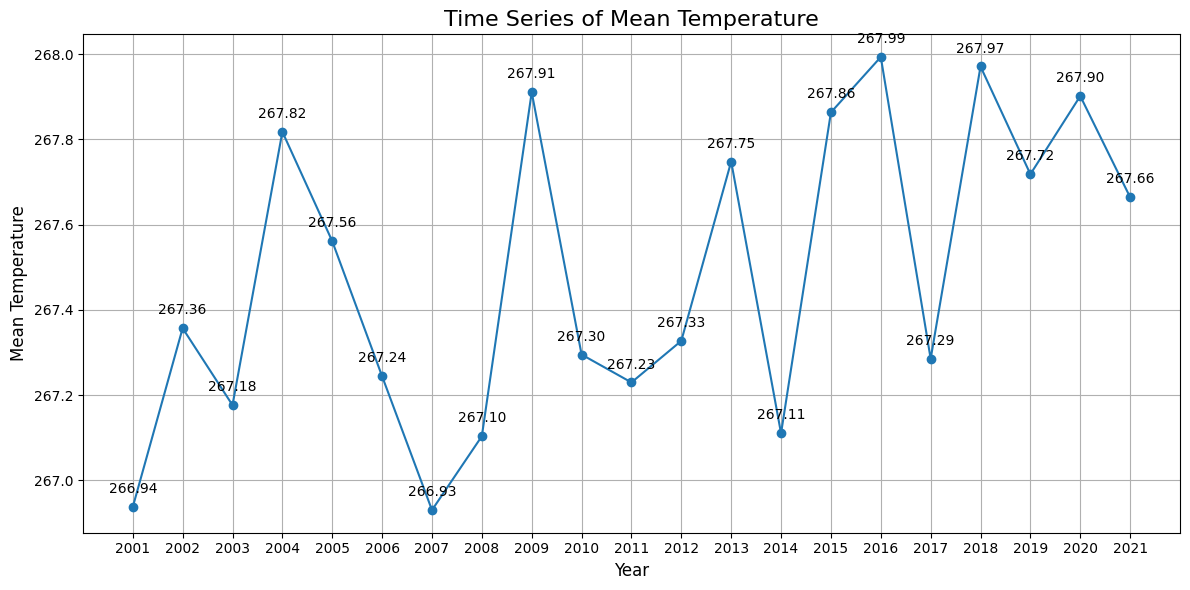

In [ ]:

# Create a pandas Series for easier plotting
temperature_series = pd.Series(temperature_mean_year)

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(years, temperature_series.values, marker='o', linestyle='-')  # Add markers and lines

# Annotate each point with its value
for i, txt in enumerate(temperature_mean_year):
    plt.annotate(f"{txt:.2f}", (years[i], temperature_series.values[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Time Series of Mean Temperature', fontsize=16) # Set title with fontsize
plt.xlabel('Year', fontsize=12) # Set x label with fontsize
plt.ylabel('Mean Temperature', fontsize=12) # Set y label with fontsize
plt.grid(True)  # Add grid lines
plt.xticks(list(years)) # Ensure all x-axis values are displayed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


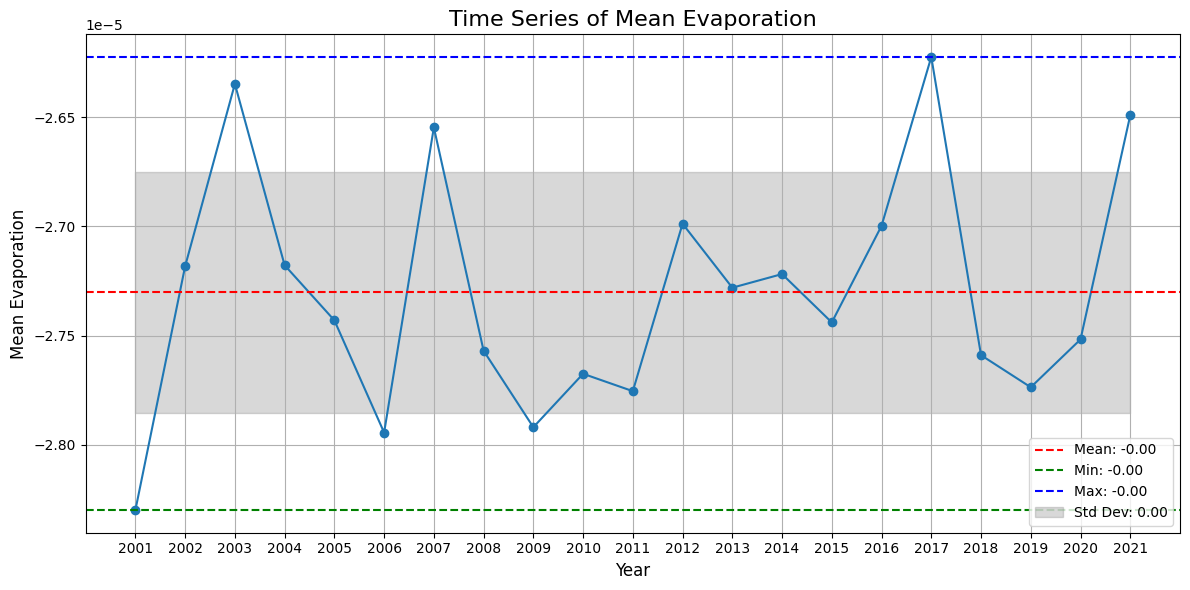

In [ ]:

# Create a pandas Series for easier plotting
temperature_series = pd.Series(temperature_mean_year)

# Calculate statistics
mean_temperature = temperature_series.mean()
min_temperature = temperature_series.min()
max_temperature = temperature_series.max()
std_temperature = temperature_series.std()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(years, temperature_series.values, marker='o', linestyle='-')  # Add markers and lines

# Add horizontal lines for mean, min, max, and std
plt.axhline(mean_temperature, color='red', linestyle='--', label=f'Mean: {mean_temperature:.2f}')
plt.axhline(min_temperature, color='green', linestyle='--', label=f'Min: {min_temperature:.2f}')
plt.axhline(max_temperature, color='blue', linestyle='--', label=f'Max: {max_temperature:.2f}')

plt.fill_between(years, mean_temperature - std_temperature, mean_evaporation + std_evaporation, color='gray', alpha=0.3, label=f'Std Dev: {std_evaporation:.2f}')


plt.title('Time Series of Mean Evaporation', fontsize=16) # Set title with fontsize
plt.xlabel('Year', fontsize=12) # Set x label with fontsize
plt.ylabel('Mean Evaporation', fontsize=12) # Set y label with fontsize
plt.grid(True)  # Add grid lines
plt.xticks(list(years)) # Ensure all x-axis values are displayed
plt.legend() # Show the legend for the lines
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# Function to plot with annotations and statistics
def plot_with_stats(data, title, ylabel):
    series = pd.Series(data)
    mean_val = series.mean()
    min_val = series.min()
    max_val = series.max()
    std_val = series.std()

    plt.figure(figsize=(12, 6))
    plt.plot(years, series.values, marker='o', linestyle='-')

    for i, year in enumerate(years):
        plt.annotate(f'{data[i]:.2f}', (year, data[i]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.axhline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axhline(min_val, color='green', linestyle='--', label=f'Min: {min_val:.2f}')
    plt.axhline(max_val, color='blue', linestyle='--', label=f'Max: {max_val:.2f}')
    plt.fill_between(years, mean_val - std_val, mean_val + std_val, color='gray', alpha=0.3, label=f'Std Dev: {std_val:.2f}')

    plt.title(title, fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.xticks(list(years))
    plt.legend()
    plt.tight_layout()
    plt.show()


# Call the function for Evaporation
plot_with_stats(evaporation_mean_year, 'Time Series of Mean Evaporation', 'Mean Evaporation')

# Call the function for Temperature
plot_with_stats(temperature_mean_year, 'Time Series of Mean Temperature', 'Mean Temperature')


In [ ]:
# Create a pandas Series for easier plotting
temperature_series = pd.Series(temperature_mean_year)

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(years, evaporation_series.values, marker='o', linestyle='-')  # Add markers and lines
plt.title('Time Series of Mean temperature', fontsize=16) # Set title with fontsize
plt.xlabel('Year', fontsize=12) # Set x label with fontsize
plt.ylabel('Mean Evaporation', fontsize=12) # Set y label with fontsize
plt.grid(True)  # Add grid lines
plt.xticks(list(years)) # Ensure all x-axis values are displayed
plt.tight_layout() # Adjust layout to prevent labels from overlapping


plt.show()

In [ ]:
# Create a list to store the years
years = list(range(2001, 2022))

# Create empty lists to store the mean values for each variable
evaporation_means = []
temperature_means = []
geopotential_means = []
precipitation_means = []
specific_cloud_ice_water_content_means = []
specific_cloud_liquid_water_content_means = []
specific_humidity_means = []
u_component_of_wind_means = []
v_component_of_wind_means = []


# Assuming evaporation_group_year, etc., are defined as in your provided code
for year_index in tqdm.tqdm(range(len(evaporation_group_year))):
    evaporation_means.append(evaporation_group_year[year_index].mean(dim=('prediction_timedelta', 'longitude', 'latitude')).values[0])
    temperature_means.append(temperature_group_year[year_index].mean(dim=('prediction_timedelta', 'longitude', 'latitude')).values[0])
    geopotential_means.append(geopotential_group_year[year_index].mean(dim=('prediction_timedelta', 'longitude', 'latitude')).values[0])
    precipitation_means.append(precipitation_cumulative_mean_group_year[year_index].mean(dim=('prediction_timedelta', 'longitude', 'latitude')).values[0])
    specific_cloud_ice_water_content_means.append(specific_cloud_ice_water_content_group_year[year_index].mean(dim=('prediction_timedelta', 'longitude', 'latitude')).values[0])
    specific_cloud_liquid_water_content_means.append(specific_cloud_liquid_water_content_group_year[year_index].mean(dim=('prediction_timedelta', 'longitude', 'latitude')).values[0])
    specific_humidity_means.append(specific_humidity_group_year[year_index].mean(dim=('prediction_timedelta', 'longitude', 'latitude')).values[0])
    u_component_of_wind_means.append(u_component_of_wind_group_year[year_index].mean(dim=('prediction_timedelta', 'longitude', 'latitude')).values[0])
    v_component_of_wind_means.append(v_component_of_wind_group_year[year_index].mean(dim=('prediction_timedelta', 'longitude', 'latitude')).values[0])




In [ ]:
#Create the DataFrame
df = pd.DataFrame({
    'Year': years,
    'Evaporation': evaporation_means,
    'Temperature': temperature_means,
    'Geopotential': geopotential_means,
    'Precipitation': precipitation_means,
    'Specific_Cloud_Ice_Water_Content': specific_cloud_ice_water_content_means,
    'Specific_Cloud_Liquid_Water_Content': specific_cloud_liquid_water_content_means,
    'Specific_Humidity': specific_humidity_means,
    'U_Component_of_Wind': u_component_of_wind_means,
    'V_Component_of_Wind': v_component_of_wind_means,
})

df

In [ ]:

from google.colab import files
df.to_csv('ngcm_mean_variables.csv', encoding = 'utf-8-sig')
files.download('ngcm_mean_variables.csv')


In [ ]:
import pandas as pd
# Load the dataframe from the CSV file
df = pd.read_csv('ngcm_mean_variables.csv')
#remove the index column if present
df = df.drop(df.columns[0], axis=1)
df

Year  Evaporation  Temperature  Geopotential  Precipitation  \
0   2001    -0.000028    266.93768     57505.880       0.400873   
1   2002    -0.000027    267.35710     57568.625       1.214248   
2   2003    -0.000026    267.17664     57550.150       2.005824   
3   2004    -0.000027    267.81772     57620.203       2.811799   
4   2005    -0.000027    267.56110     57571.730       3.661214   
5   2006    -0.000028    267.24435     57502.977       4.514099   
6   2007    -0.000027    266.93057     57444.150       5.325723   
7   2008    -0.000028    267.10376     57553.690       6.106673   
8   2009    -0.000028    267.91050     57623.120       6.919768   
9   2010    -0.000028    267.29526     57480.740       7.693239   
10  2011    -0.000028    267.22986     57537.510       8.515843   
11  2012    -0.000027    267.32742     57560.543       9.407926   
12  2013    -0.000027    267.74786     57629.824      10.229140   
13  2014    -0.000027    267.11050     57577.547      11.020511   
14  2015    -0.000027    267.86320     57666.164      11.835734   
15  2016    -0.000027    267.99310     57649.043      12.570230   
16  2017    -0.000026    267.28534     57558.190      13.331227   
17  2018    -0.000028    267.97083     57647.434      14.174779   
18  2019    -0.000028    267.71820     57594.410      15.060389   
19  2020    -0.000028    267.90155     57587.790      15.842223   
20  2021    -0.000026    267.66420     57483.355      16.190744   

    Specific_Cloud_Ice_Water_Content  Specific_Cloud_Liquid_Water_Content  \
0                       1.068847e-06                             0.000009   
1                       9.435697e-07                             0.000009   
2                       9.096959e-07                             0.000008   
3                       8.044467e-07                             0.000009   
4                       9.641617e-07                             0.000009   
5                       9.813625e-07                             0.000009   
6                       9.460319e-07                             0.000009   
7                       1.014295e-06                             0.000009   
8                       8.291424e-07                             0.000009   
9                       9.658954e-07                             0.000009   
10                      1.081393e-06                             0.000010   
11                      9.257390e-07                             0.000009   
12                      8.376879e-07                             0.000009   
13                      9.202076e-07                             0.000009   
14                      7.772196e-07                             0.000009   
15                      7.986112e-07                             0.000009   
16                      8.953639e-07                             0.000009   
17                      9.280517e-07                             0.000010   
18                      9.123497e-07                             0.000009   
19                      8.210122e-07                             0.000009   
20                      9.370637e-07                             0.000010   

    Specific_Humidity  U_Component_of_Wind  V_Component_of_Wind  
0            0.001438             1.468133            -0.381264  
1            0.001538             1.563968            -0.309005  
2            0.001414             1.972763            -0.184781  
3            0.001550             1.794583            -0.310050  
4            0.001465             1.783995            -0.216201  
5            0.001535             1.628011            -0.422214  
6            0.001406             1.373758            -0.392004  
7            0.001430             1.991848            -0.495365  
8            0.001488             1.551841            -0.198690  
9            0.001405             1.313283            -0.228710  
10           0.001504             1.659200            -0.405961  
11           0.001457             2.054548

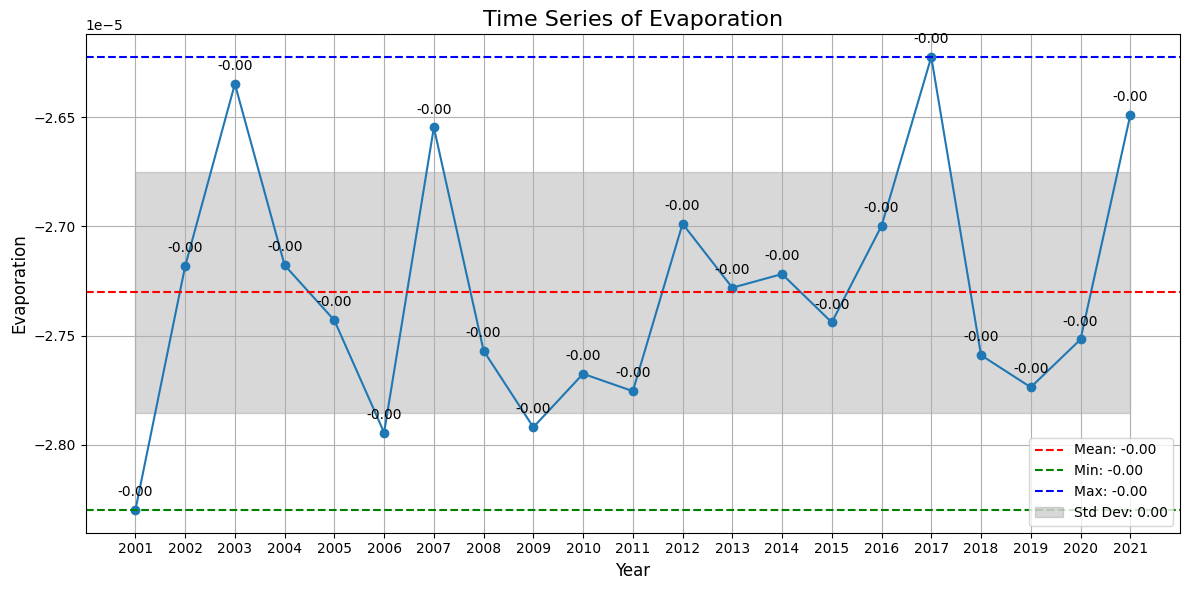

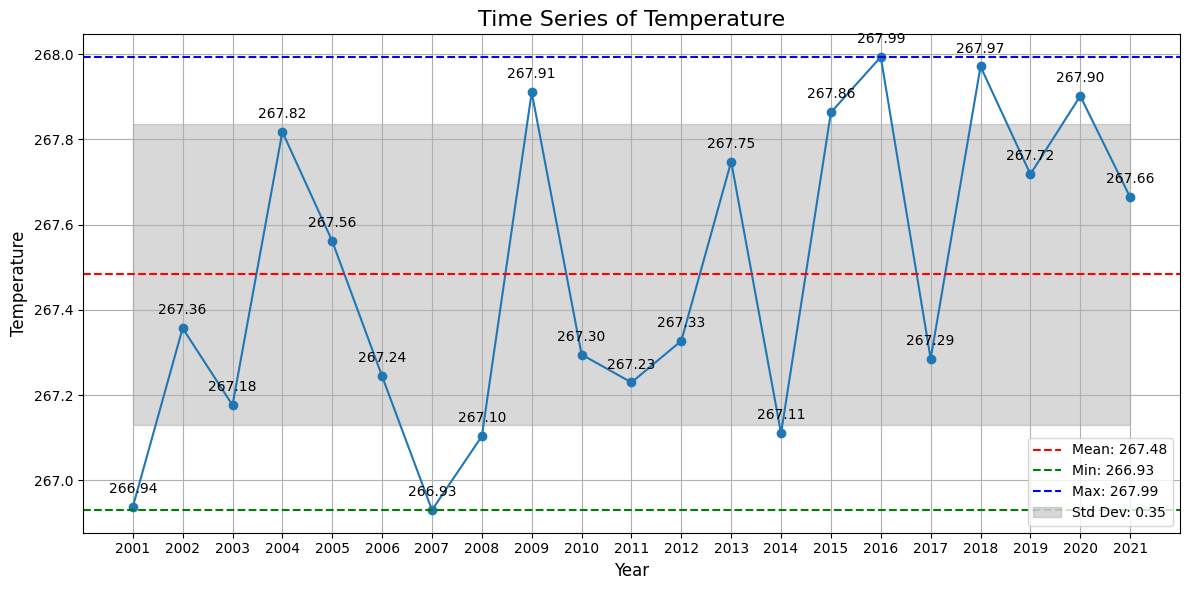

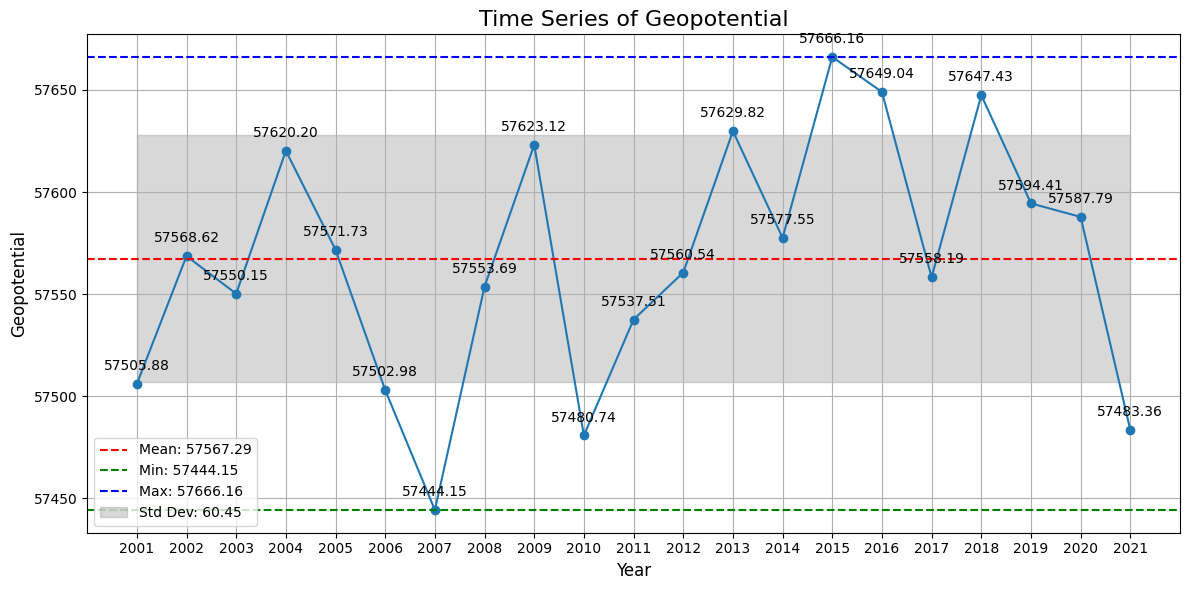

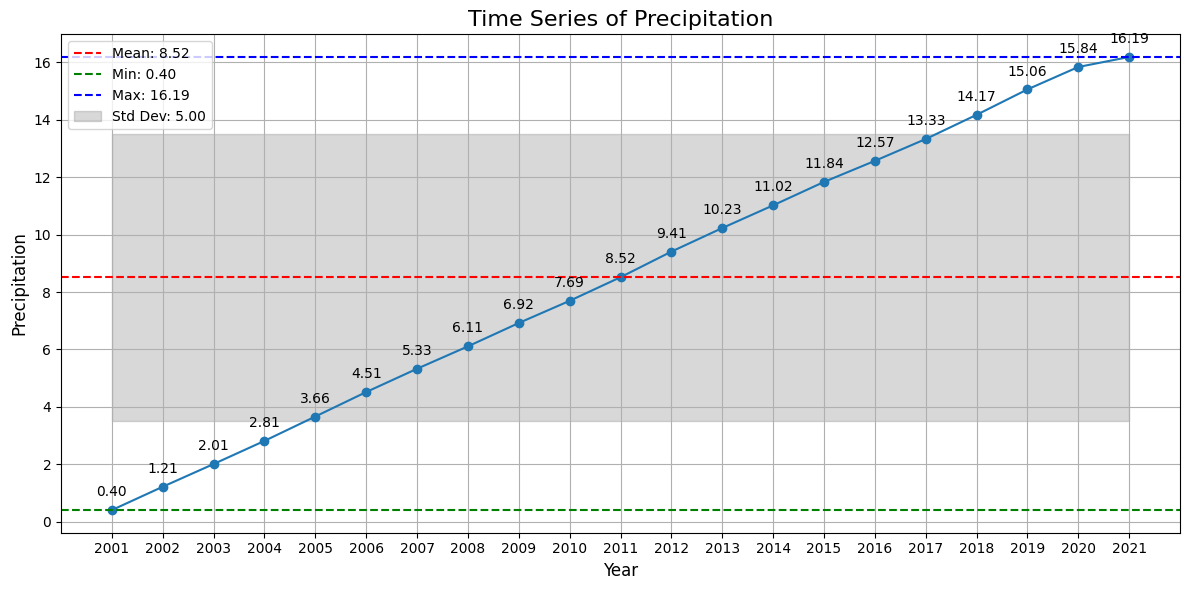

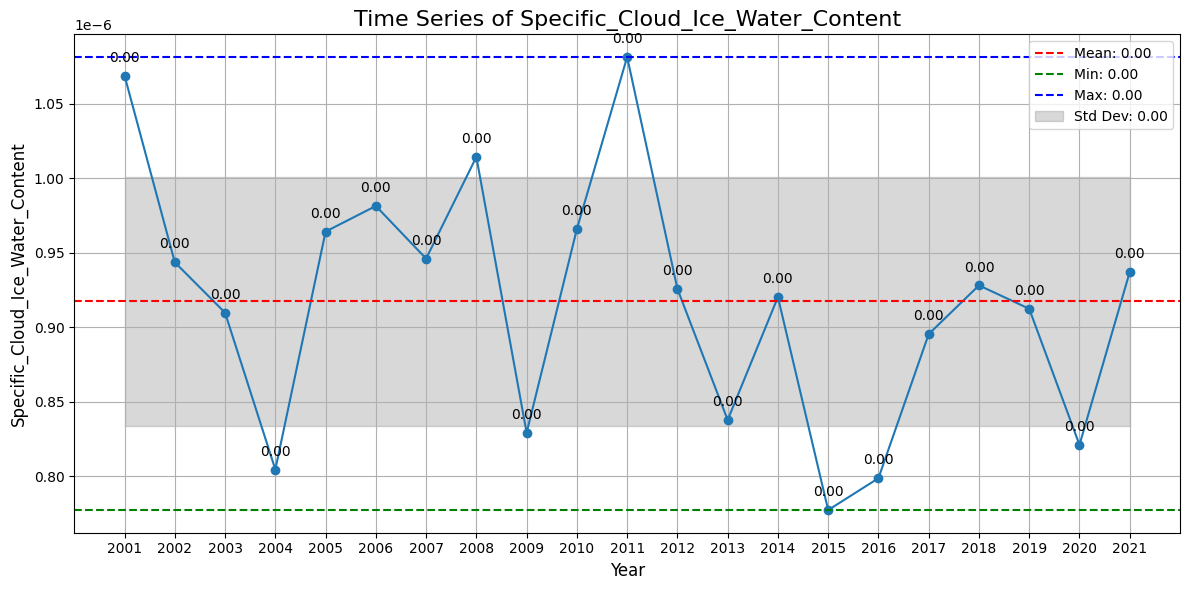

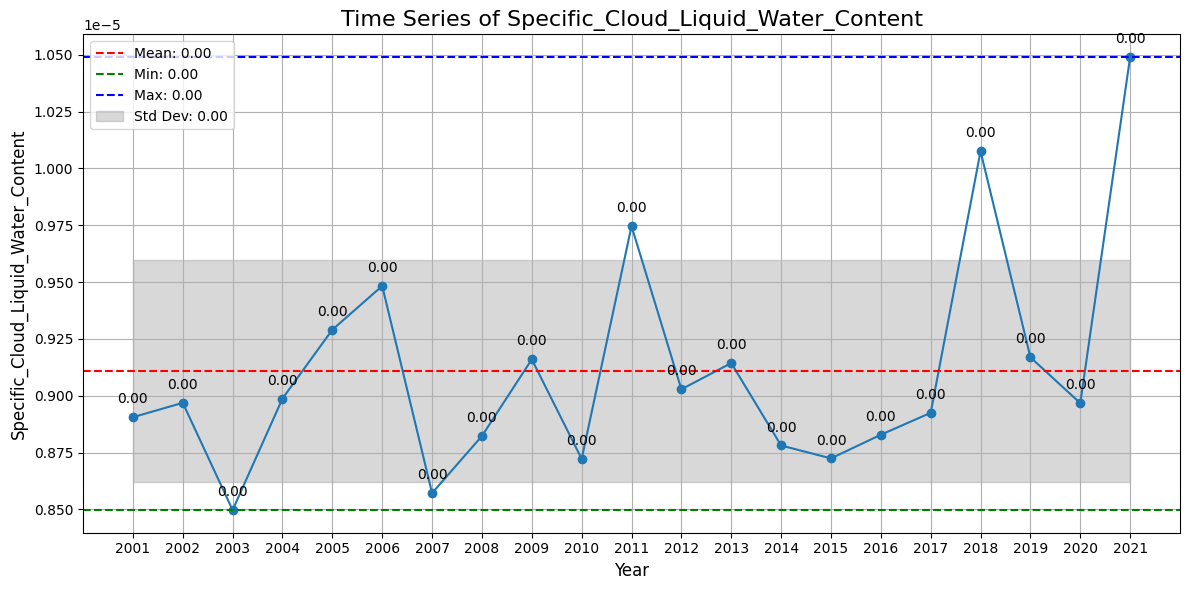

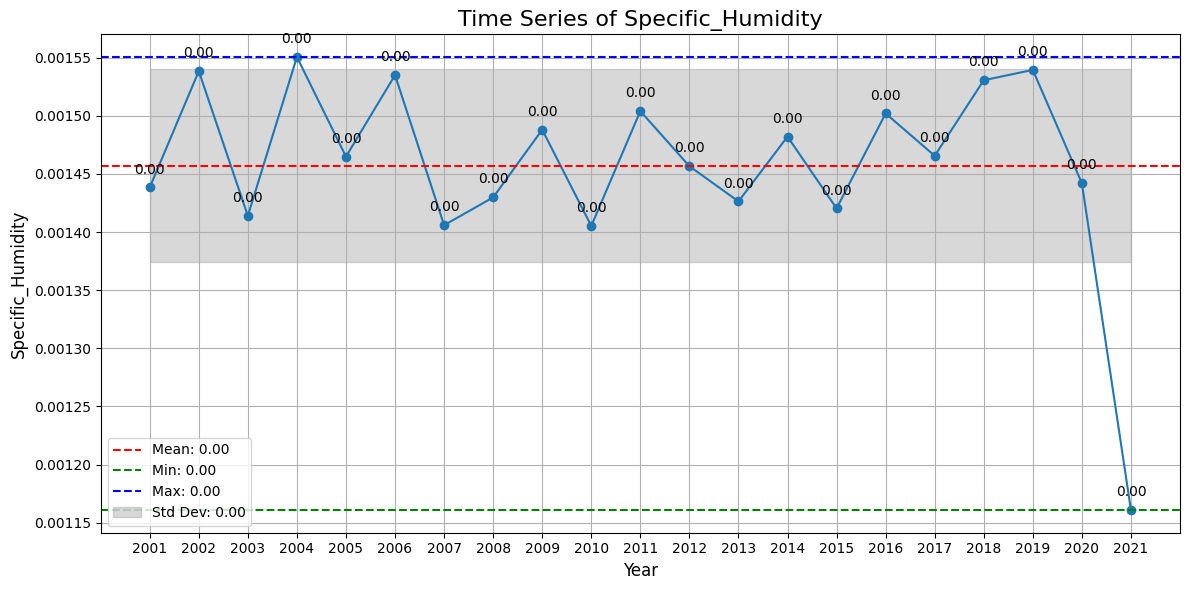

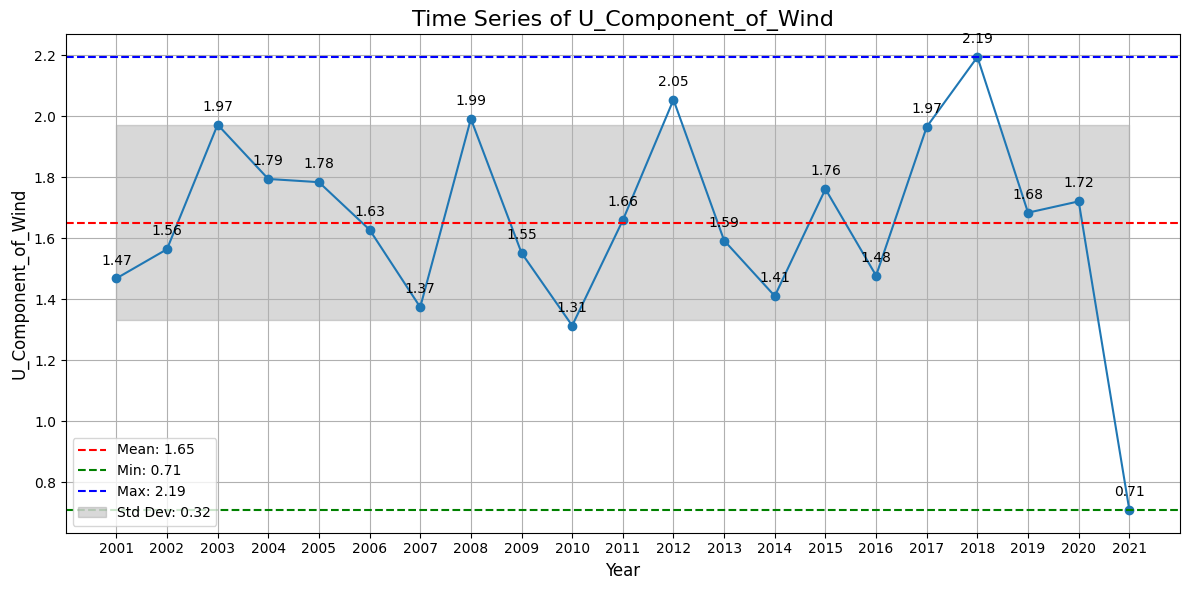

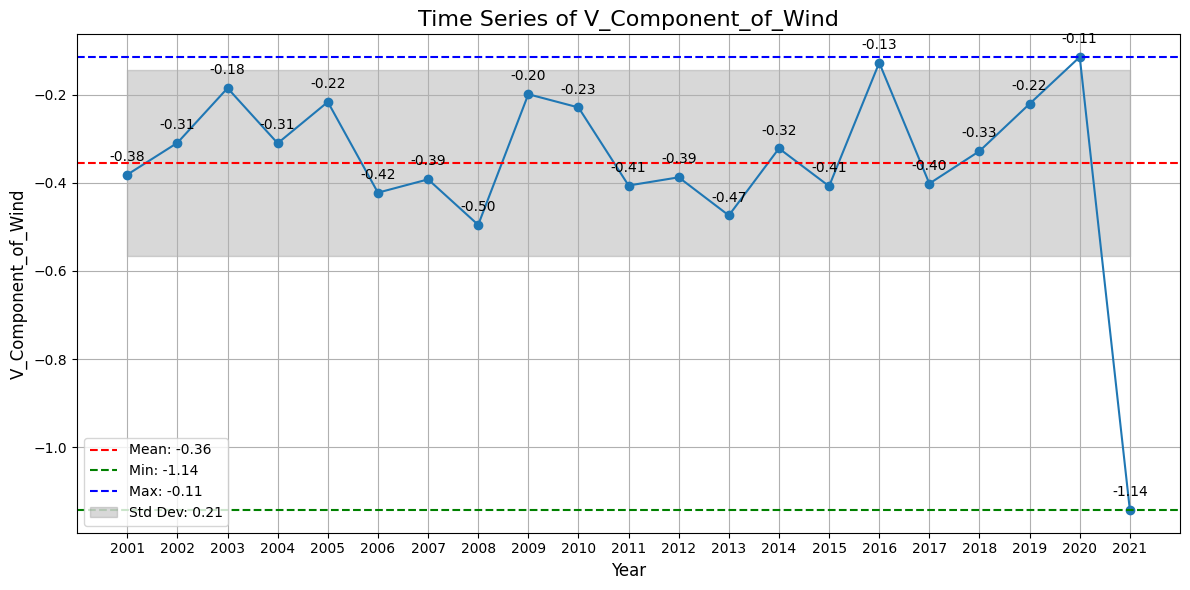

In [ ]:

import matplotlib.pyplot as plt
# Function to plot with annotations and statistics
def plot_with_stats(data, title, ylabel):
    series = pd.Series(data)
    mean_val = series.mean()
    min_val = series.min()
    max_val = series.max()
    std_val = series.std()
    plt.figure(figsize=(12, 6))
    plt.plot(years, series.values, marker='o', linestyle='-')
    for i, year in enumerate(years):
        plt.annotate(f'{data[i]:.2f}', (year, data[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    plt.axhline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axhline(min_val, color='green', linestyle='--', label=f'Min: {min_val:.2f}')
    plt.axhline(max_val, color='blue', linestyle='--', label=f'Max: {max_val:.2f}')
    plt.fill_between(years, mean_val - std_val, mean_val + std_val, color='gray', alpha=0.3, label=f'Std Dev: {std_val:.2f}')
    plt.title(title, fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.xticks(list(years))
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage with the dataframe:
years = df['Year'].values.tolist()

# Plotting for each variables
for col in df.columns:
    if col != 'Year':
        plot_with_stats(df[col].values.tolist(), f'Time Series of {col}', col)
